In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid

In [68]:
df_org = pd.read_csv('vacation.csv', index_col='month')
df_org.head()

,vacation
month,
2004-01,98
2004-02,86
2004-03,82
2004-04,77
2004-05,81


<Axes: xlabel='month'>

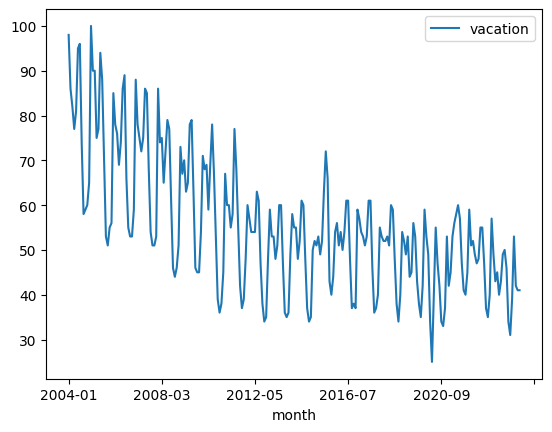

In [69]:
df_org.plot()

In [70]:
df = df_org.copy()

In [71]:
for i in range(12,0,-1):
  print(i)
  df['t='+str(i)] = df['vacation'].shift(i)

12
11
10
9
8
7
6
5
4
3
2
1


In [72]:
df

,vacation,t=12,t=11,t=10,t=9,t=8,t=7,t=6,t=5,t=4,t=3,t=2,t=1
month,,,,,,,,,,,,,
2004-01,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0
2004-03,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,86.0
2004-04,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,86.0,82.0
2004-05,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,86.0,82.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11,39,40.0,57.0,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0
2023-12,53,57.0,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0,39.0
2024-01,42,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0,39.0,53.0


In [73]:
df.dropna(inplace=True)

In [74]:
df

,vacation,t=12,t=11,t=10,t=9,t=8,t=7,t=6,t=5,t=4,t=3,t=2,t=1
month,,,,,,,,,,,,,
2005-01,100,98.0,86.0,82.0,77.0,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0
2005-02,90,86.0,82.0,77.0,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0,100.0
2005-03,90,82.0,77.0,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0,100.0,90.0
2005-04,75,77.0,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0,100.0,90.0,90.0
2005-05,77,81.0,95.0,96.0,74.0,58.0,59.0,60.0,65.0,100.0,90.0,90.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11,39,40.0,57.0,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0
2023-12,53,57.0,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0,39.0
2024-01,42,49.0,43.0,45.0,40.0,43.0,49.0,50.0,46.0,34.0,31.0,39.0,53.0


In [75]:
X = df.iloc[:,1:].values
X

array([[ 98.,  86.,  82., ...,  59.,  60.,  65.],
       [ 86.,  82.,  77., ...,  60.,  65., 100.],
       [ 82.,  77.,  81., ...,  65., 100.,  90.],
       ...,
       [ 49.,  43.,  45., ...,  31.,  39.,  53.],
       [ 43.,  45.,  40., ...,  39.,  53.,  42.],
       [ 45.,  40.,  43., ...,  53.,  42.,  41.]])

In [76]:
y = df.iloc[:,0].values
y

array([100,  90,  90,  75,  77,  94,  88,  71,  53,  51,  55,  56,  85,
        78,  76,  69,  74,  86,  89,  66,  55,  53,  53,  59,  88,  78,
        75,  72,  75,  86,  85,  68,  54,  51,  51,  53,  86,  74,  75,
        65,  72,  79,  77,  61,  46,  44,  46,  51,  73,  67,  70,  63,
        65,  78,  79,  63,  46,  45,  45,  54,  71,  68,  69,  59,  69,
        78,  67,  53,  39,  36,  38,  45,  67,  60,  60,  55,  58,  77,
        68,  55,  42,  37,  39,  48,  60,  57,  54,  54,  54,  63,  61,
        47,  38,  34,  35,  48,  59,  53,  53,  48,  51,  60,  60,  47,
        36,  35,  36,  49,  58,  55,  55,  48,  52,  61,  60,  48,  37,
        34,  35,  50,  52,  51,  53,  49,  52,  63,  72,  66,  43,  40,
        44,  54,  56,  51,  54,  50,  54,  61,  61,  48,  37,  38,  37,
        59,  57,  54,  53,  51,  53,  61,  61,  46,  36,  37,  40,  55,
        53,  52,  52,  53,  51,  60,  59,  48,  38,  34,  40,  54,  52,
        49,  53,  44,  45,  56,  53,  43,  38,  35,  42,  59,  5

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.7668649755021678 {'random_state': 67, 'n_estimators': 100, 'max_features': 6, 'learning_rate': 0.03}

In [78]:
gbr = GradientBoostingRegressor(random_state=67, n_estimators=100, max_features=6, learning_rate=0.03)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_features=6, random_state=67)

In [79]:
train_predict = gbr.predict(X_train)
test_predict = gbr.predict(X_test)

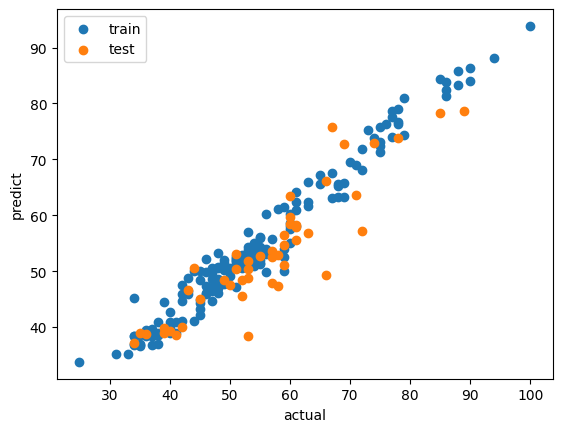

In [80]:
plt.scatter(y_train, train_predict, label='train')
plt.scatter(y_test, test_predict, label='test')
plt.xlabel('actual')
plt.ylabel('predict')
plt.legend()

In [81]:
from sklearn.metrics import mean_absolute_percentage_error

In [82]:
mean_absolute_percentage_error(y_train, train_predict) * 100

4.556631931956514

In [83]:
mean_absolute_percentage_error(y_test, test_predict) * 100

7.741950433178831

In [84]:
def get_first_eval_batch(data, n):
  return data[-n:].reshape(-1,n)

In [85]:
train = df_org[:-12]
test = df_org[-12:]

In [86]:
n_lag = 12
test_prediction_gbr = []
current_batch = get_first_eval_batch(train['vacation'].values, n_lag)
for i in range(len(test)):
  current_pred = gbr.predict(current_batch)[0]
  test_prediction_gbr.append(current_pred)
  current_batch = np.append(current_batch[:,1:], current_pred).reshape(-1, n_lag)

In [87]:
test_prediction_gbr

[42.72636036082749,
 46.39997472482705,
 51.91901213455271,
 52.01092445984295,
 45.465182290163355,
 38.335510816545224,
 36.90317642041191,
 39.93107735783397,
 51.46623758671091,
 47.3771081266736,
 40.84130508739642,
 38.6267826938077]

<Axes: xlabel='month'>

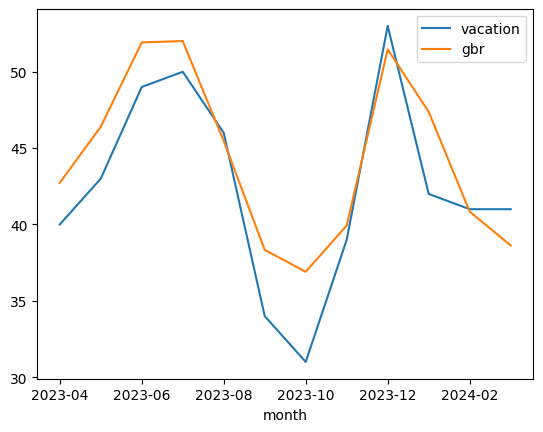

In [88]:
df_comp = test['vacation'].to_frame()
df_comp['gbr'] = test_prediction_gbr
df_comp.plot()

In [89]:
mean_absolute_percentage_error(test['vacation'], test_prediction_gbr) * 100

6.826482735479115

# Lets construct arima model for this model

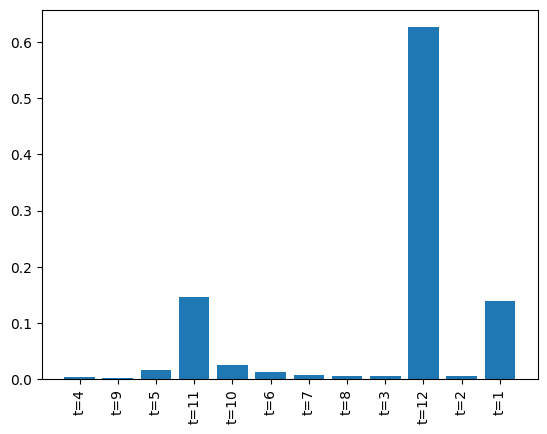

In [90]:
feature_importanceRFR = gbr.feature_importances_
sorted_idx = np.argsort(feature_importanceRFR[::-1])
x1 = range(len(feature_importanceRFR))
feature_names = df.columns.to_list()[1:]
labels = np.array(feature_names)[sorted_idx]
plt.bar(x1, feature_importanceRFR[sorted_idx], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

In [91]:
import shap

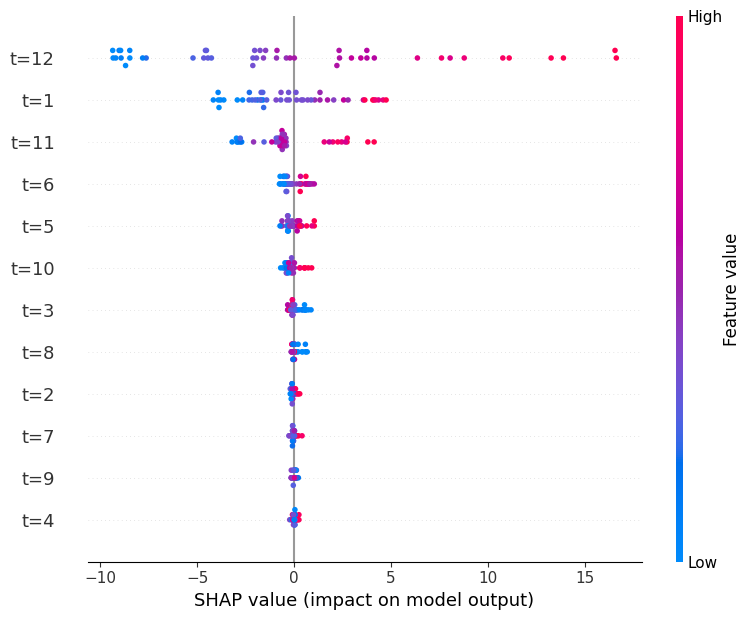

In [92]:
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:])


shap.summary_plot(shap_values, X_test, feature_names=df.columns.to_list()[1:], max_display=12)

In [93]:
grid = {'n_estimators': [50, 100, 200], 'max_features': [3, 6, 9], 'random_state': [67, 189, 43, 11], 'learning_rate': [0.01, 0.02, 0.03]}

In [94]:
from sklearn.model_selection import ParameterGrid

In [95]:
best_scores = []
for g in ParameterGrid(grid):
  gbr = GradientBoostingRegressor(**g)
  gbr.fit(X_train, y_train)
  score = gbr.score(X_test, y_test)
  best_scores.append(score)

In [96]:
best_idx = np.argmax(best_scores)
print(best_scores[best_idx], ParameterGrid(grid)[best_idx])

0.7668649755021678 {'random_state': 67, 'n_estimators': 100, 'max_features': 6, 'learning_rate': 0.03}
